In [1]:
#!pip install statsmodels
#!pip install scipyp

In [2]:
#import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
%matplotlib inline

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

import seaborn as sns

In [3]:
# Read Sales.xls
salesdf = pd.read_excel('Sales.xls')

In [4]:
salesdf.dtypes

Row ID                           int64
Order ID                         int64
Order Date              datetime64[ns]
Order Priority                  object
Order Quantity                   int64
Sales                          float64
Discount                       float64
Ship Mode                       object
Profit                         float64
Unit Price                     float64
Shipping Cost                  float64
Customer Name                   object
Province                        object
Region                          object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Name                    object
Product Container               object
Product Base Margin            float64
Ship Date               datetime64[ns]
dtype: object

Specifically in ML, we need to decide whether data is gaussian/normal for model learning, model evaluation and residual errors evaluation (from a regression problem). We can only use parameteric ML models once data is Gaussian or Gaussian-enough. 

In BI, this is useful to facilitate our statistical testing to validate the normality through normality testing. Many statistical techniques and models assume that the data is normally distributed. For instance, parametric statistical tests like t-tests, ANOVA, linear regression, etc., assume normality of the data.

In [5]:
# Generate random numbers. 
seed(32)

data = 5 * randn(100) + 50

print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.318 stdv=5.143


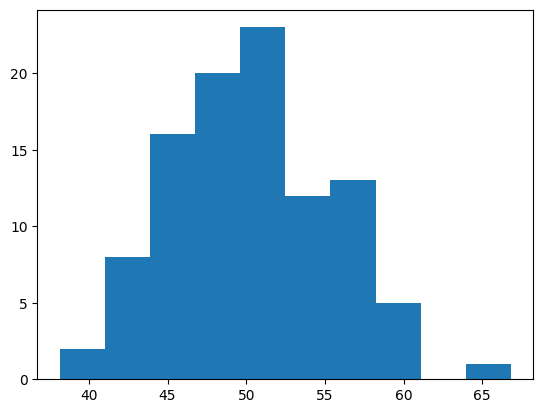

In [6]:
pyplot.hist(data)
pyplot.show()

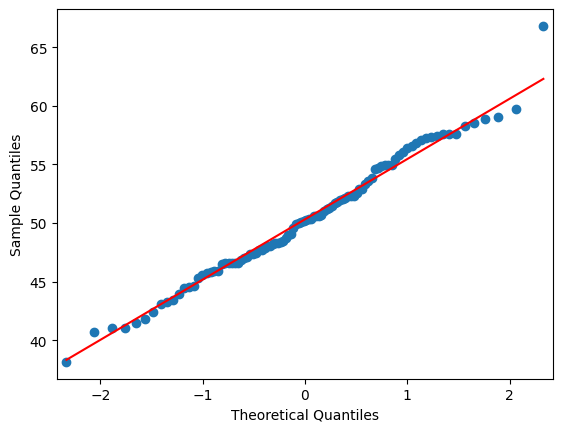

In [7]:
qqplot(data, line='s')
pyplot.show()

The QQ plot compares the distribution of the dataset against the theoretical normal distribution. Specifically, it plots the quantiles of the dataset against the quantiles of a theoretical normal distribution. If the dataset is normally distributed, the points on the QQ plot will lie approximately along a straight line. Any deviation from a straight line suggests deviation from normality.

Since the dataset data is generated from a normal distribution with mean 50 and standard deviation 5, the QQ plot is expected to show approximately a straight line, indicating that the dataset follows a normal distribution. However, slight deviations might occur due to randomness in the generated dataset.

### Shapiro Wilk Test

In [8]:
# considered to be reliable for smaller datasets
# Null hypothesis=data is normal
# Alternate hypothesis= data is not normal
W, pvalue = shapiro(data)
print('W=%.4f, p=%.4f' % (W, pvalue))

W=0.9874, p=0.4667


### K2 test

In [9]:
#checks gaussianness based on skewness and kurtosis
# Null hypothesis=data is normal
# Alternate hypothesis= data is not normal
k2stat, pvalue = normaltest(data)
print('K2stat=%.4f, p=%.4f' % (k2stat, pvalue))

K2stat=0.9570, p=0.6197


### Kolmogorov-Smimov Test

In [10]:
output = anderson(data)
print('Output: %.4f' % output.statistic)

p = 0
for i in range(len(output.critical_values)):
    sl, cv = output.significance_level[i], output.critical_values[i]
    if output.statistic < output.critical_values[i]:
        print('%.4f: %.4f, data looks normal (cant reject H0)' % (sl, cv))
    else:
        print('%.4f: %.4f, data not look normal (reject H0)' % (sl, cv))


Output: 0.3488
15.0000: 0.5550, data looks normal (cant reject H0)
10.0000: 0.6320, data looks normal (cant reject H0)
5.0000: 0.7590, data looks normal (cant reject H0)
2.5000: 0.8850, data looks normal (cant reject H0)
1.0000: 1.0530, data looks normal (cant reject H0)


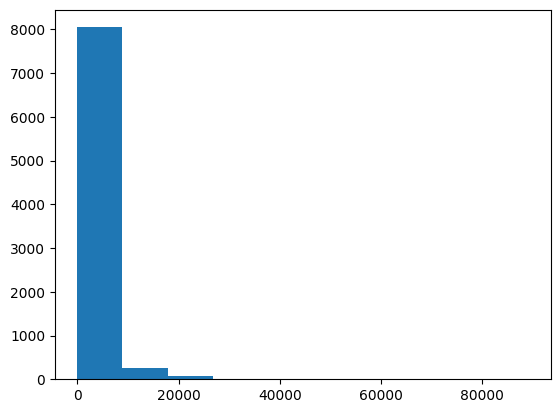

In [11]:
pyplot.hist(salesdf['Sales'])
pyplot.show()

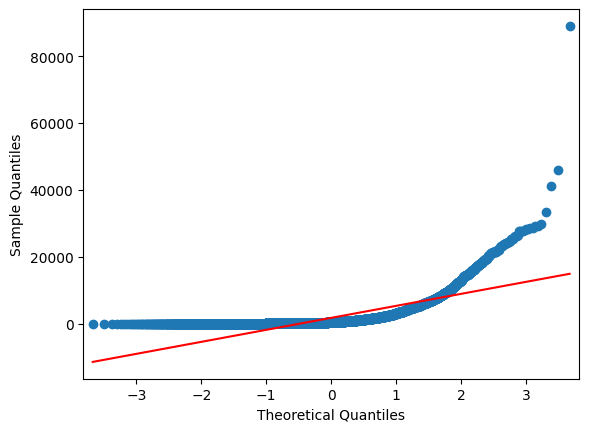

In [12]:
qqplot(salesdf['Sales'], line='s')
pyplot.show()

In [13]:
W, pvalue = shapiro(salesdf['Sales'])
print('W=%.4f, p=%.4f' % (W, pvalue))

W=0.4985, p=0.0000


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8399.
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
k2stat, pvalue = normaltest(salesdf['Sales'])
print('K2stat=%.4f, p=%.4f' % (k2stat, pvalue))

K2stat=9206.9868, p=0.0000


In [15]:
output = anderson(salesdf['Sales'])
print('Output: %.4f' % output.statistic)

p = 0
for i in range(len(output.critical_values)):
    sl, cv = output.significance_level[i], output.critical_values[i]
    if output.statistic < output.critical_values[i]:
        print('%.4f: %.4f, data looks normal (cant reject H0)' % (sl, cv))
    else:
        print('%.4f: %.4f, data does not look normal (reject H0)' % (sl, cv))


Output: 1296.3058
15.0000: 0.5760, data does not look normal (reject H0)
10.0000: 0.6560, data does not look normal (reject H0)
5.0000: 0.7870, data does not look normal (reject H0)
2.5000: 0.9180, data does not look normal (reject H0)
1.0000: 1.0910, data does not look normal (reject H0)


<Axes: ylabel='Sales'>

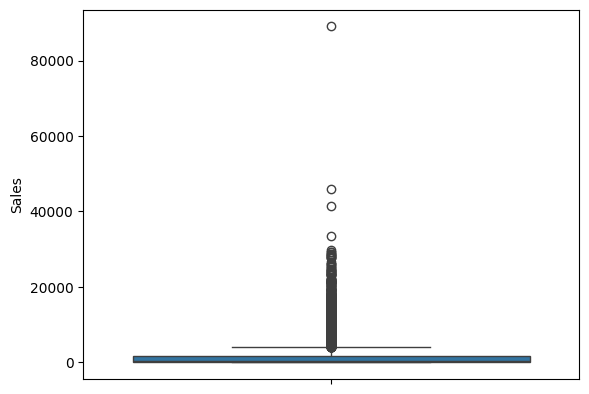

In [16]:
sns.boxplot(salesdf['Sales'])